<a href="https://colab.research.google.com/github/Migaalee/RI_clinical_trials/blob/main/RI_project_part1X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project description

## Explanation of the dataset.

# Import all packages that will be used

In [1]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

#For uploading our dataset
import xml.etree.ElementTree as ET #Parse and read XML data
import tarfile #read from tarfile instead of extracting all data

from google.colab import files #this is to load files from your local disk

### Upload data and setup 

For small size files you can use the following (can not use for large files)

In [35]:

qrels = files.upload()
 

Saving qrels-clinical_trials.txt to qrels-clinical_trials.txt
time: 27.1 s (started: 2021-10-27 22:36:38 +00:00)


In [3]:
topics_description = files.upload()


Saving topics-2014_2015-description.topics to topics-2014_2015-description.topics


In [42]:
topics_summary = files.upload()

Saving topics-2014_2015-summary.topics to topics-2014_2015-summary.topics
time: 11.1 s (started: 2021-10-27 22:58:53 +00:00)


In [25]:
trec = files.upload()

Saving trec.py to trec.py
time: 23.2 s (started: 2021-10-27 22:18:55 +00:00)


In [28]:
rank_metric = files.upload()

Saving rank_metric.py to rank_metric.py
time: 9.28 s (started: 2021-10-27 22:23:02 +00:00)


This is to read directly from Joao google drive. For some reason not always works...I think because it is too large or some permissions

In [ ]:
#tar = !wget -v 'https://drive.google.com/uc?export=download&id=1PteSqtZ8GdHOEF-mLGV2dZTR_3iRBVM7'

## Mount Google drive with your files

Upload tar file to google drive 

> Make a new folder in your google drive (e.g. RI_2021)


> Upload file "clinicaltrials.gov-16_dec_2015.tgz" to that folder



> Get a link for the folder. For example, my link was (https://drive.google.com/drive/folders/1ZBRDc0irOY74R7IpDf0rJDFIiA43DjI9?usp=sharing). I have shared it with you guys. 




> Use only part of the link until ? (this is file name): 1ZBRDc0irOY74R7IpDf0rJDFIiA43DjI9




Install PyDrive to mount your disk (in case you want to put big file in your own drive)

In [6]:
!pip install -U -q PyDrive

Use the following code in order to give access to your Google Drive.

In [7]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [10]:
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

file_list = drive.ListFile(
    {'q': "'1URzrvrz5pf9L5kpDpUkj0ExYTXVbrmkk' in parents"}).GetList() #this is my file name from before

In [11]:
print(file_list)

[GoogleDriveFile({'kind': 'drive#file', 'id': '1YXuEFUUgXm0Nv1izHU2gNiiYvDwEbu2k', 'etag': '"MTYzNDc1MTU1NTAwMA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1YXuEFUUgXm0Nv1izHU2gNiiYvDwEbu2k', 'webContentLink': 'https://drive.google.com/uc?id=1YXuEFUUgXm0Nv1izHU2gNiiYvDwEbu2k&export=download', 'alternateLink': 'https://drive.google.com/file/d/1YXuEFUUgXm0Nv1izHU2gNiiYvDwEbu2k/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1YXuEFUUgXm0Nv1izHU2gNiiYvDwEbu2k/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/x-compressed', 'title': 'clinicaltrials.gov-16_dec_2015.tgz', 'mimeType': 'application/x-compressed', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-10-27T22:02:53.201Z', 'modifiedDate': '2021-10-20T17:39:15.000Z', 'modifiedByMeDate': '2021-10-20T17:39:15.000Z', 'lastViewedByMeDate': '2021

You can check that your file is there

In [12]:
for f in file_list:
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: clinicaltrials.gov-16_dec_2015.tgz, id: 1YXuEFUUgXm0Nv1izHU2gNiiYvDwEbu2k
downloading to /root/data/clinicaltrials.gov-16_dec_2015.tgz
title: ProjectoRI2020-20200923T174337Z-001.zip, id: 1oiWdO1d30irgdjdZIEfyYw2HrfttLmUP
downloading to /root/data/ProjectoRI2020-20200923T174337Z-001.zip


In [24]:

os.listdir(local_download_path)

time: 5.98 ms (started: 2021-10-27 22:17:24 +00:00)


In [13]:
tar = tarfile.open("/root/data/clinicaltrials.gov-16_dec_2015.tgz", "r:gz")

# This is basic matching algorithm (for troubleshooting our code)

In [15]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]

#learn a vocabulary of unigrams and bigrams

index = TfidfVectorizer(ngram_range=(1,2), analyzer='word', stop_words = None)
index.fit(corpus)


# Compute the copus representation

X = index.transform(corpus)

# Compute the query representation 
query = ['document']
query_tfidf = index.transform(query)

#Compute the query-corpus similarity for all documents

doc_scores = 1 - pairwise_distances(X, query_tfidf, metric = 'cosine')

print(doc_scores)

[[0.3145322 ]
 [0.45551258]
 [0.        ]
 [0.28293955]]


# CT loaders code

In [16]:

for tarinfo in tar:
    print(tarinfo.name, "is", tarinfo.size, "bytes in size and is ", end="")
    if tarinfo.isreg():
        print("a regular file.")
    elif tarinfo.isdir():
        print("a directory.")
    else:
        print("something else.")
    if tarinfo.size > 500:
        txt = tar.extractfile(tarinfo).read().decode("utf-8", "strict")
        print(txt)
        print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
        root = ET.fromstring(txt)

        for doc_id in root.iter('nct_id'):
            print("Clinical Trial ID: ", doc_id.text)

        for brief_title in root.iter('brief_title'):
            print("brief_title: ", brief_title.text)
        for detailed_description in root.iter('detailed_description'):
            for child in detailed_description:
                print("detailed_description: ", child.text.strip())
        for brief_summary in root.iter('brief_summary'):
            for child in brief_summary:
                print("brief_summary: ", child.text.strip())

        for criteria in root.iter('criteria'):
            for child in criteria:
                print("criteria: ", child.text.strip())
        for phase in root.iter('phase'):
            print("phase: ", phase.text)
        for study_type in root.iter('study_type'):
            print("study_type: ", study_type.text)
        for study_design in root.iter('study_design'):
            print("study_design: ", study_design.text)
        for condition in root.iter('condition'):
            print("condition: ", condition.text)

        for intervention in root.iter('intervention'):
            for child in intervention:
                print(child.tag, ": ", child.text.strip())

        for gender in root.iter('gender'):
            print("gender: ", gender.text)
        for minimum_age in root.iter('minimum_age'):
            print("minimum_age: ", minimum_age.text)
        for maximum_age in root.iter('maximum_age'):
            print("maximum_age: ", maximum_age.text)
        for healthy_volunteers in root.iter('healthy_volunteers'):
            print("healthy_volunteers: ", healthy_volunteers.text)
        for mesh_term in root.iter('mesh_term'):
            print("mesh_term: ", mesh_term.text.strip())
        
        break
tar.close()

./._clinicaltrials.gov-16_dec_2015 is 216 bytes in size and is a regular file.
clinicaltrials.gov-16_dec_2015 is 0 bytes in size and is a directory.
clinicaltrials.gov-16_dec_2015/._NCT00000102.xml is 216 bytes in size and is a regular file.
clinicaltrials.gov-16_dec_2015/NCT00000102.xml is 4521 bytes in size and is a regular file.
<?xml version="1.0" encoding="UTF-8"?>
<clinical_study rank="204855">
  <!-- This xml conforms to an XML Schema at:
    https://clinicaltrials.gov/ct2/html/images/info/public.xsd
 and an XML DTD at:
    https://clinicaltrials.gov/ct2/html/images/info/public.dtd -->
  <required_header>
    <download_date>ClinicalTrials.gov processed this data on December 16, 2015</download_date>
    <link_text>Link to the current ClinicalTrials.gov record.</link_text>
    <url>https://clinicaltrials.gov/show/NCT00000102</url>
  </required_header>
  <id_info>
    <org_study_id>NCRR-M01RR01070-0506</org_study_id>
    <secondary_id>M01RR001070</secondary_id>
    <nct_id>NCT00000

# Function to read only clinical trials that we will use in small dataset

In [17]:
from collections import Counter
# Open file
f = open('qrels-clinical_trials.txt', 'r')

# Read and ignore header lines
#header1 = f.readline()
#header2 = f.readline()
#header3 = f.readline()

small_list=[]
# Loop over lines and extract variables of interest
for line in f:
    line = line.strip()
    columns = line.split()
    patient_ID = columns[0]
    score = float(columns[3])
    name = columns[2]
    small_list.append(name)
    #print(name)
print('Total number of trials:',len(Counter(small_list)))

Total number of trials: 3626


In [18]:
!pip install ipython-autotime

## Code that is working on colab now

---



In [43]:
%load_ext autotime
import xml.etree.ElementTree as ET
import tarfile
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer

tar = tarfile.open("/root/data/clinicaltrials.gov-16_dec_2015.tgz", "r:gz")

# Save trials IDs in set
trials = []
corpus = []
ids = []
with open("qrels-clinical_trials.txt", "r") as file:
    file.seek(0) # set position to start of file
    lines = file.read().splitlines() # now we won't have those newlines
    for line in lines:
        splitLine = line.split()
        trials.append(splitLine[2])

for tarinfo in tar:  #Read every file in the tar, extracting the trial ID and the brief_summary if that trial is in the available trials list
    if tarinfo.size > 500:
        txt = tar.extractfile(tarinfo).read().decode("utf-8", "strict")
        root = ET.fromstring(txt)
        docId = None
        for doc_id in root.iter('nct_id'): #Get the trial(doc) ID
            #print("Clinical Trial ID: ", doc_id.text)
            docId = doc_id.text
        if(docId in trials): #If docId is in the available trials list, proceed
            #print("DocID " + docId + " is in trials")
            ids.append(docId) # Add the trial ID to 'ids'
            for brief_summary in root.iter('brief_summary'):
                for child in brief_summary:
                    #print("brief_summary: ", child.text.strip())
                    #corpus.append(child.text.strip().replace('\n', ' ').replace('\r', '') # Removing \n and \r, replacing with spaces (necessary??)
                    corpus.append(child.text.strip()) # Add the brief_summary to the corpus

                    
print("Corpus lenght: ",len(corpus))      
    
index = TfidfVectorizer(ngram_range=(1,2), analyzer='word', stop_words = None) #NOTE: I think this is where we should start optimising
index.fit(corpus)

# Compute the corpus representation
X = index.transform(corpus)

# Compute the query representation - extract patientId and title of the patient's problems
patientId = []
patientDesc = []

tree = ET.parse('topics-2014_2015-summary.topics')
root = tree.getroot()
for num in root.iter('NUM'):
    patientId.append(num.text)
for title in root.iter('TITLE'):
    patientDesc.append(title.text)  
    
print(patientDesc)
query_tfidf = index.transform(patientDesc)

# Compute the query-corpus similarity for all documents
doc_scores = 1 - pairwise_distances(X, query_tfidf, metric='cosine')   #NOTE: Here we also need to try other methods
print(doc_scores)
tar.close() 

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Corpus lenght:  3625
['58-year-old woman with hypertension and obesity presents with exercise-related episodic chest pain radiating to the back.\n       \t\t', '8-year-old boy with 2 days of loose stools, fever, and cough after returning from a trip to Colorado. Chest x-ray shows bilateral lung infiltrates.\n       \t\t', ' 58-year-old female non-smoker with left lung mass on x-ray. Head CT shows a solitary right frontal lobe mass.\n       \t\t', '2-year-old boy with fever and irritability for 5 days. Physical exam findings include conjunctivitis, strawberry tongue, and desquamation of the fingers and toes. Lab results include low albumin, elevated white blood cell count and C-reactive protein, and urine leukocytes. Echo shows moderate dilation of the coronary arteries.\n       \t\t', '56-year-old woman presents with shortness of breath 3 weeks after surgical mastectomy. Physical exam is significant for

In [33]:
import xml.etree.ElementTree as ET
import matplotlib as plt
import pandas as pd
import numpy as np
import trec
import pprint as pp
import pickle

time: 3.15 ms (started: 2021-10-27 22:31:48 +00:00)


qrels-clinical_trials.txt
time: 3.3 ms (started: 2021-10-27 23:03:48 +00:00)


In [48]:
queries = "topics-2014_2015-summary.topics"
qrels = "qrels-clinical_trials.txt"

with open(queries, 'r') as queries_reader:
    txt = queries_reader.read()

root = ET.fromstring(txt)

cases = {}
for query in root.iter('TOP'):
    q_num = query.find('NUM').text
    q_title = query.find('TITLE').text
    cases[q_num] = q_title

eval = trec.TrecEvaluation(cases, qrels)

time: 19.8 ms (started: 2021-10-27 23:05:26 +00:00)


In [50]:
avg_precision_11point = np.zeros(11)
for (caseid,query) in zip(patientId, patientDesc):
    query_tfidf = index.transform([query])

    doc_scores = 1 - pairwise_distances(X, query_tfidf, metric='cosine')
    
    results = pd.DataFrame(list(zip(ids, doc_scores)), columns = ['_id', 'score'])
    results_ord = results.sort_values(by=['score'], ascending = False)
    
    [p10, recall, ap, ndcg5, mrr] = eval.eval(results_ord, caseid)
    [precision_11point, recall_11point, total_relv_ret] = eval.evalPR(results_ord, caseid)

    if (np.shape(recall_11point) != (0,)):
        avg_precision_11point = avg_precision_11point + precision_11point

    #print(ap)


time: 42.7 s (started: 2021-10-27 23:06:25 +00:00)


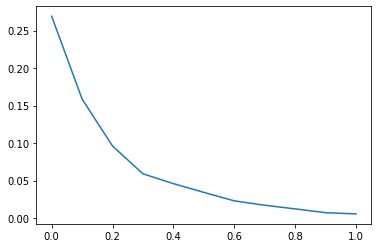

time: 193 ms (started: 2021-10-27 23:07:12 +00:00)


In [51]:
import matplotlib.pyplot as plt
plt.plot(recall_11point,avg_precision_11point/len(cases))
